## 1. Customer Churn Analysis (Telecom Industry)

## 2. Objective - Analyze customer churn behavior and identify key factors influencing churn.

## Tools Used - Python, Pandas, Matplotlib, Seaborn  

In [2]:
!pip install pandas numpy matplotlib seaborn

## 3. Dataset Overview

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("telecom_churn.csv")

In [5]:
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


## 4. Data Cleaning & Preparation

In [32]:
df.shape # The dataset contains 243,553 customer records and 14 features.

(243553, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [8]:
df['churn'].value_counts() # How many customers churned

churn
0    194726
1     48827
Name: count, dtype: int64

In [9]:
df['churn'].value_counts(normalize=True) # How many did not 

churn
0    0.799522
1    0.200478
Name: proportion, dtype: float64

In [10]:
df.isnull().sum() # Check missing values

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [11]:
df.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [12]:
df['date_of_registration'].head()

0    2020-01-01
1    2020-01-01
2    2020-01-01
3    2020-01-01
4    2020-01-01
Name: date_of_registration, dtype: object

In [13]:
df['date_of_registration'] = pd.to_datetime(df['date_of_registration']) # Convert to Date

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           243553 non-null  int64         
 1   telecom_partner       243553 non-null  object        
 2   gender                243553 non-null  object        
 3   age                   243553 non-null  int64         
 4   state                 243553 non-null  object        
 5   city                  243553 non-null  object        
 6   pincode               243553 non-null  int64         
 7   date_of_registration  243553 non-null  datetime64[ns]
 8   num_dependents        243553 non-null  int64         
 9   estimated_salary      243553 non-null  int64         
 10  calls_made            243553 non-null  int64         
 11  sms_sent              243553 non-null  int64         
 12  data_used             243553 non-null  int64         
 13 

In [15]:
df.loc[df['calls_made'] < 0, 'calls_made'] = 0 # handle negative values

In [16]:
df.loc[df['data_used'] < 0, 'data_used'] = 0

In [17]:
df[['calls_made', 'data_used']].describe() # both minimum value set to 0 

,calls_made,data_used
count,243553.000000,243553.000000
mean,49.120122,5001.354802
std,29.260198,2927.420055
min,0.000000,0.000000
25%,24.000000,2490.000000
50%,49.000000,4987.000000
75%,74.000000,7493.000000
max,108.000000,10991.000000


In [18]:
analysis_df = df.drop(columns=['customer_id'])

In [19]:
analysis_df.columns # we see 13 column 

Index(['telecom_partner', 'gender', 'age', 'state', 'city', 'pincode',
       'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')

## 5. Exploratory Data Analysis (EDA)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 5.1 Univariate Analysis (Analyzing One variable (column) at a time)

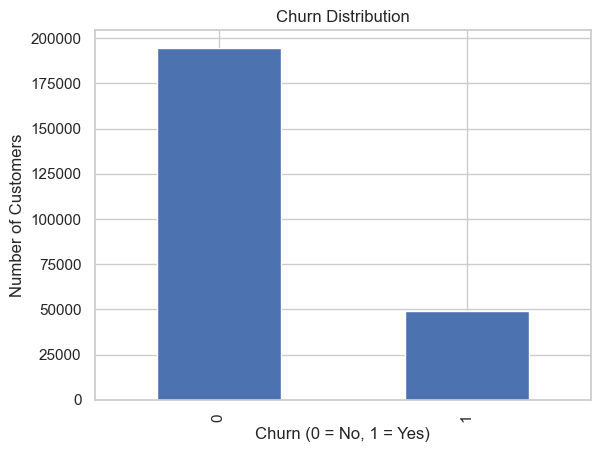

In [21]:
analysis_df['churn'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

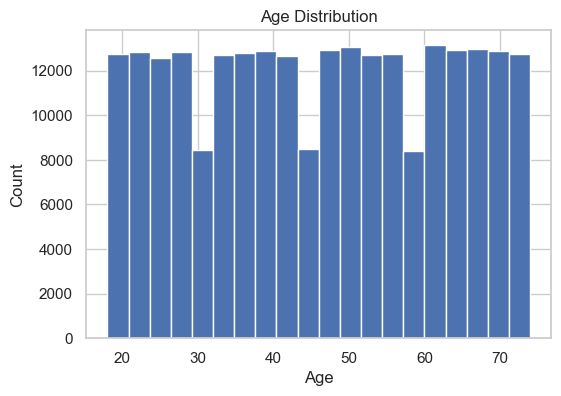

In [22]:
plt.figure(figsize=(6,4))
plt.hist(analysis_df['age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

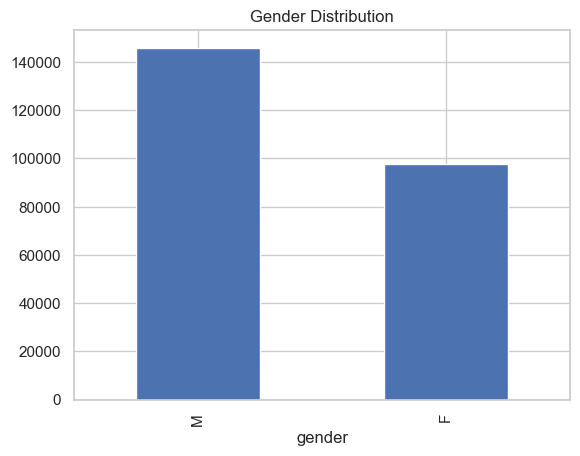

In [23]:
analysis_df['gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.show()

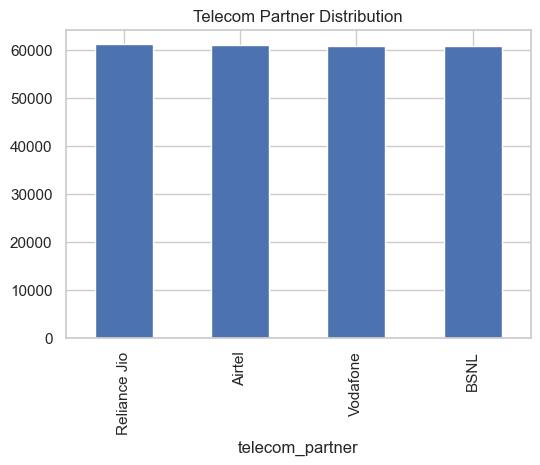

In [24]:
analysis_df['telecom_partner'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Telecom Partner Distribution")
plt.show()

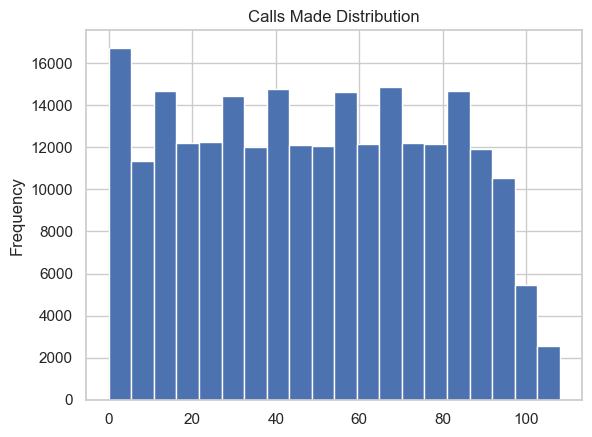

In [34]:
# call made 
analysis_df['calls_made'].plot(kind='hist', bins=20)
plt.title("Calls Made Distribution")
plt.show()

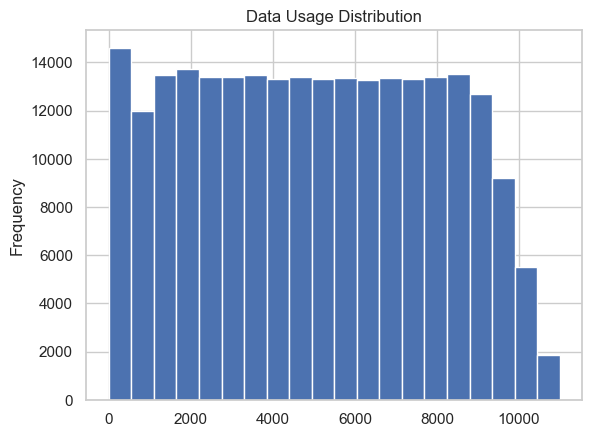

In [26]:
# data made
analysis_df['data_used'].plot(kind='hist', bins=20)
plt.title("Data Usage Distribution")
plt.show()

## 5.2 Bivariate Analysis (Analyzing Two variable (column) at a time)

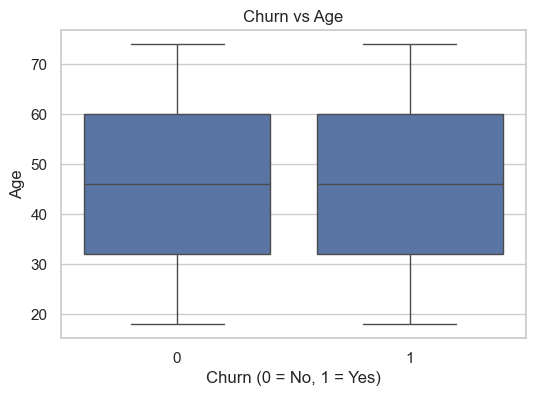

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='age', data=analysis_df)
plt.title("Churn vs Age")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

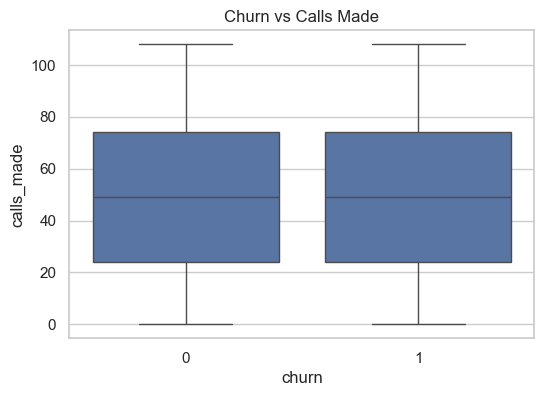

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='calls_made', data=analysis_df)
plt.title("Churn vs Calls Made")
plt.show()

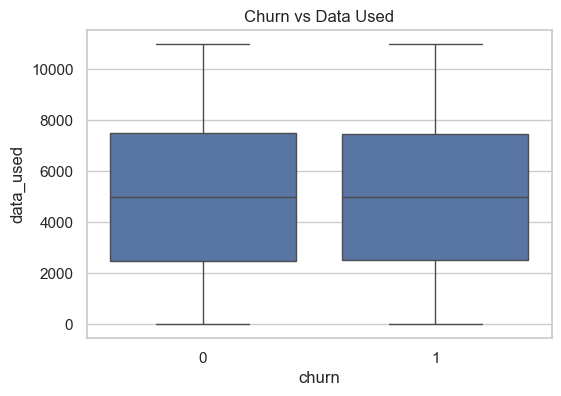

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='data_used', data=analysis_df)
plt.title("Churn vs Data Used")
plt.show()

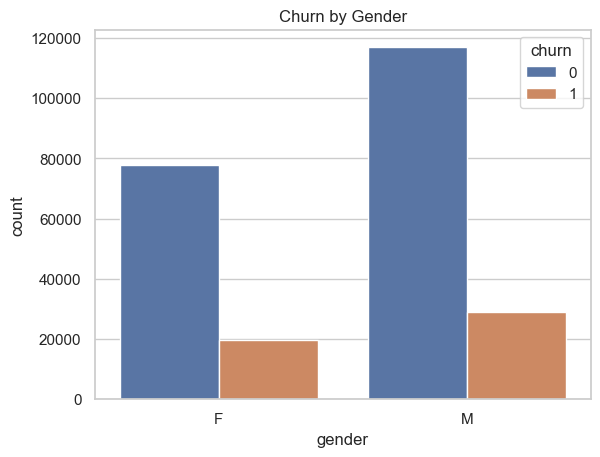

In [30]:
sns.countplot(x='gender', hue='churn', data=analysis_df)
plt.title("Churn by Gender")
plt.show()

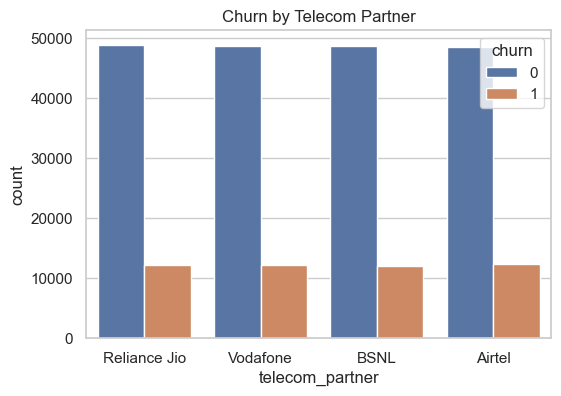

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='telecom_partner', hue='churn', data=analysis_df)
plt.title("Churn by Telecom Partner")
plt.show()

## 6. Key Insights
- Age is not a strong factor influencing customer churn
- Low call usage → higher churn
- Low data usage → higher churn
- Gender has minimal impact
- Telecom partner matters slightly

## 7. Business Recommendations

- Target low-usage customers
- Promote data-heavy plans
- Partner-specific strategies
- Focus on engagement, not demographics

## 8. Final conclusion 

This analysis shows that customer churn in the telecom sector is mainly influenced by how customers use the service rather than who they are. Customers who make fewer calls and use less data are more likely to leave the service. By focusing on increasing customer engagement through better plans and offers, telecom companies can reduce churn and build long-term customer loyalty."""